Loading dataset from 'Mall_Customers.csv'...
Dataset loaded successfully.
Dataset shape: (200, 5)

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending S

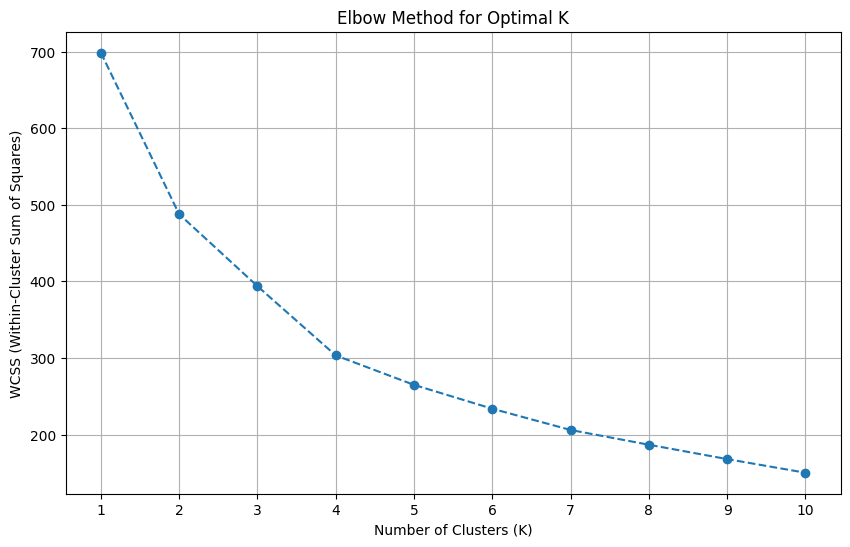


Based on the Elbow Method plot, look for the 'elbow point' where the decrease in WCSS slows down significantly.
Commonly, K=5 is a good choice for this dataset due to a visible elbow.

Applying K-Means Clustering with optimal K = 5...
Cluster labels added to the dataset.

First 5 rows with Cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Analyzing characteristics of each cluster:

--- Cluster 0 (Count: 39) ---
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000

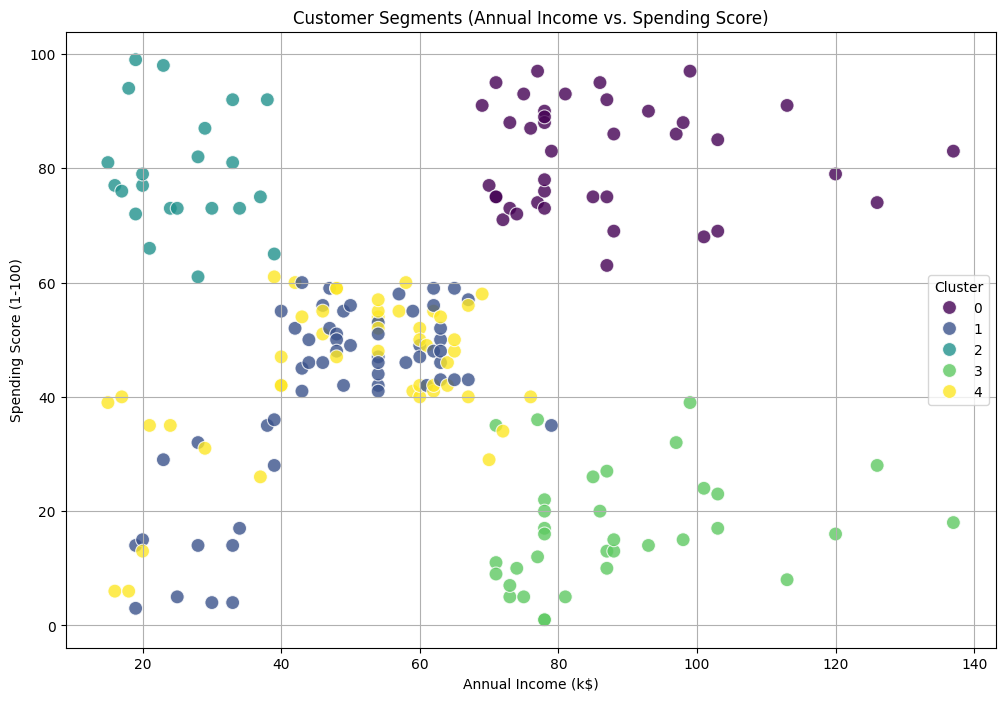

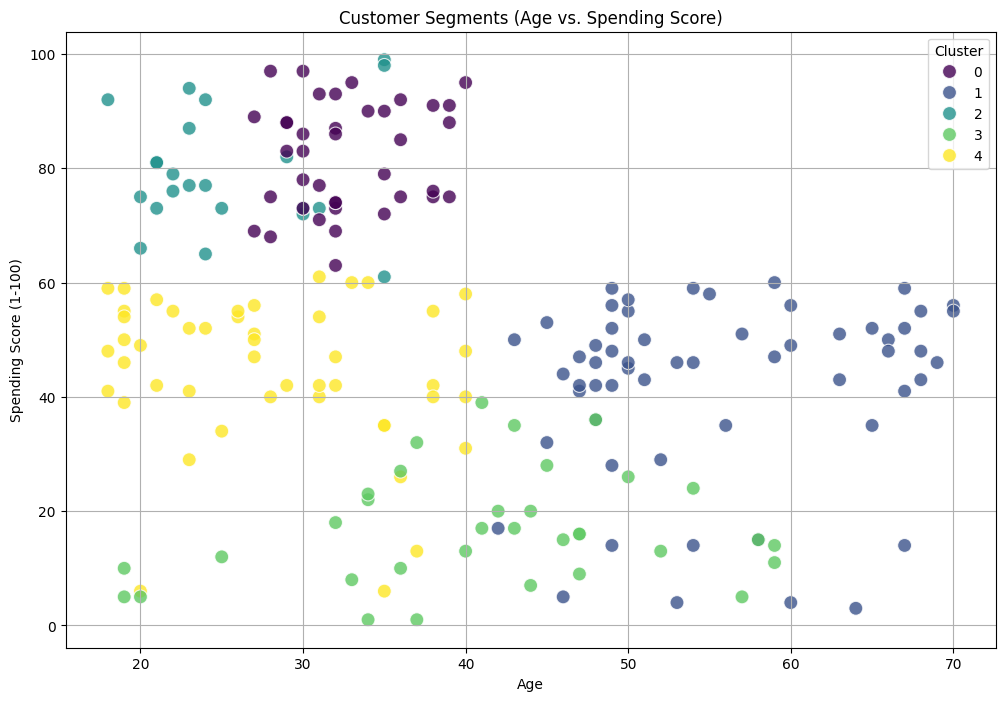

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
data_file = 'Mall_Customers.csv'
if not os.path.exists(data_file):
    print(f"Error: The dataset file '{data_file}' was not found.")
    print(f"Please download it from {data_url} and place it in the same directory.")
    sys.exit(1)
print(f"Loading dataset from '{data_file}'...")
try:
    df = pd.read_csv(data_file)
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except Exception as e:
    print(f"Error loading dataset: {e}")
    sys.exit(1)
X = df.drop('CustomerID', axis=1)
print("\nFeatures after dropping CustomerID:")
print(X.head())
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns
print(f"\nCategorical features: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")
if len(categorical_features) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_features = encoder.fit_transform(X[categorical_features])
    encoded_feature_names = encoder.get_feature_names_out(categorical_features)
    X_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)
    X_processed = X.drop(columns=categorical_features).reset_index(drop=True)
    X_processed = pd.concat([X_processed, X_encoded], axis=1)
else:
    X_processed = X.copy()
print(f"\nFeatures after One-Hot Encoding (shape: {X_processed.shape}):")
print(X_processed.head())
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
X_processed[features_to_scale] = scaler.fit_transform(X_processed[features_to_scale])
print("\nFeatures after Scaling (first 5 rows):")
print(X_processed.head())
wcss = []
k_range = range(1, 11)
print("\nRunning Elbow Method to find optimal K...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()
print("\nBased on the Elbow Method plot, look for the 'elbow point' where the decrease in WCSS slows down significantly.")
print("Commonly, K=5 is a good choice for this dataset due to a visible elbow.")
optimal_k = 5
print(f"\nApplying K-Means Clustering with optimal K = {optimal_k}...")
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans_model.fit_predict(X_processed)
df['Cluster'] = clusters
print("Cluster labels added to the dataset.")
print("\nFirst 5 rows with Cluster labels:")
print(df.head())
print("\nAnalyzing characteristics of each cluster:")
for i in range(optimal_k):
    print(f"\n--- Cluster {i} (Count: {len(df[df['Cluster'] == i])}) ---")
    print(df[df['Cluster'] == i][['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].describe())
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments (Age vs. Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()